In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [431]:
data = arff.loadarff('./dataset/Abalone/abalone.arff')
df = pd.DataFrame(data[0])

df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Class_Rings
0,b'M',0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,b'M',0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,b'F',0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,b'M',0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,b'I',0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,b'F',0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,b'M',0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,b'M',0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,b'F',0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


### Task 1

In [432]:
X =df.iloc[:,1].values 
Y =df.iloc[:,2].values
correlation_coefficient =df.iloc[:,1].corr(df.iloc[:,2])
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=0)

In [433]:
'{:.4f}'.format(correlation_coefficient)

'0.9868'

In [434]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))


y_predict = model.predict(x_test.reshape(-1,1))

y_predict

array([[0.42932553],
       [0.38867276],
       [0.48623941],
       ...,
       [0.37647693],
       [0.46184775],
       [0.20573529]])

In [435]:
'Diameter = {}Length + {}'.format(model.coef_, model.intercept_
)

'Diameter = [[0.81305541]]Length + [-0.01785494]'

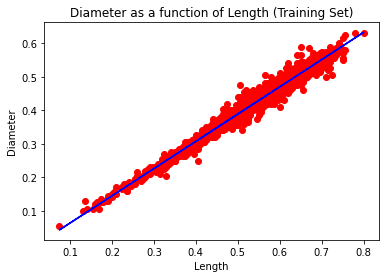

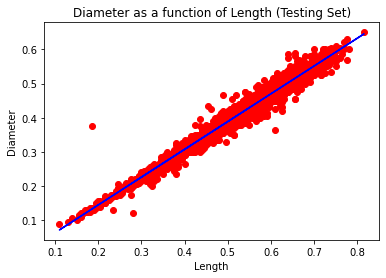

In [436]:
plt.scatter(x_train, y_train, color='red')  # plotting the observation line
# plotting the regression line
plt.plot(x_train, model.predict(x_train.reshape(-1,1)), color='blue')
# stating the title of the graph
plt.title('Diameter as a function of Length (Training Set)')

plt.xlabel("Length")  
plt.ylabel("Diameter")  
plt.show()  

#plot for the TEST

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, model.predict(x_test.reshape(-1, 1)), color='blue')
plt.title('Diameter as a function of Length (Testing Set)')
plt.xlabel("Length")
plt.ylabel("Diameter")
plt.show()



In [437]:
r2 = model.score(x_test.reshape(-1,1), y_test.reshape(-1,1))
r2

0.9730084520896173

### Task 2

In [438]:
X = df.iloc[:,5:8].values
X_tag = df[['Shucked weight','Viscera weight','Shell weight']]
Y = df.iloc[:,4].values

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=10)

In [439]:
model = LinearRegression()
model.fit(x_train, y_train)



LinearRegression()

In [440]:
print('{} \n {} '.format(model.intercept_ , list(zip(X_tag, model.coef_))))


-0.0100604227387463 
 [('Shucked weight', 0.9462349893133839), ('Viscera weight', 1.1730984292343953), ('Shell weight', 1.196495022830344)] 


In [441]:
y_predict = model.predict(x_test)

y_predict

array([0.40307747, 1.0688229 , 0.91238764, ..., 0.49330214, 1.00477916,
       0.85010832])

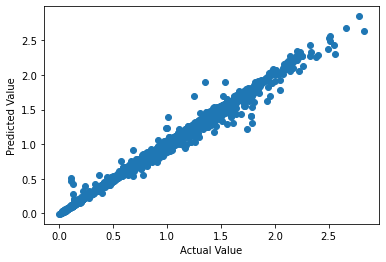

In [442]:
plt.scatter(y_test ,y_predict)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [443]:
r2 =model.score(x_test, y_test)

r2

0.9905655492008831

### Task 3


Linear model : $y = ax+b$

In [444]:
X = df.iloc[:,2].values
Y = df.iloc[:,4].values

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=10)

In [445]:
corr_ = df.iloc[:,2].corr(df.iloc[:,4])
'{:.4f}'.format(corr_)


'0.9255'

In [446]:
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))


y_predict = model.predict(x_test.reshape(-1, 1))


In [447]:
'weight = {} diameter + {}'.format(model.coef_, model.intercept_)

'weight = [[4.59053393]] diameter + [-1.04876314]'

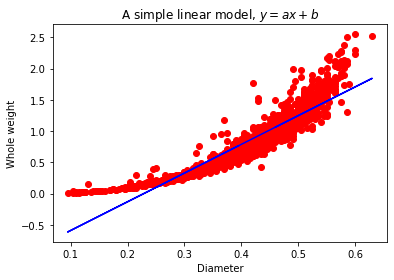

In [448]:
plt.scatter(x_train, y_train, color='red')  # plotting the observation line
# plotting the regression line
plt.plot(x_train, model.predict(x_train.reshape(-1, 1)), color='blue')
# stating the title of the graph
plt.title('A simple linear model, $y = ax + b$')

plt.xlabel("Diameter")
plt.ylabel("Whole weight")
plt.show()


Quadratic model : $y =ax+bx^2+c$

In [449]:
from sklearn.preprocessing import PolynomialFeatures


Method 1

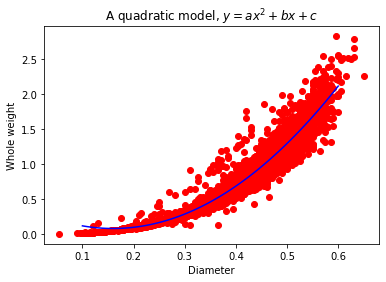

      2
10.5 x - 3.356 x + 0.3477


In [450]:
model = np.poly1d(np.polyfit(X, Y, 2))

polyline = np.linspace(.1,.6,100)
plt.scatter(X, Y, color='red')
plt.plot(polyline, model(polyline),color='blue')
plt.title('A quadratic model, $y = ax^2 + bx +c$')
plt.xlabel("Diameter")
plt.ylabel("Whole weight")
plt.show()
print(model)


In [451]:
model

poly1d([10.49680583, -3.35552485,  0.34772094])

Method 2

In [452]:
poly_reg =PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1,1))  
X_poly

array([[1.      , 0.365   , 0.133225],
       [1.      , 0.265   , 0.070225],
       [1.      , 0.42    , 0.1764  ],
       ...,
       [1.      , 0.475   , 0.225625],
       [1.      , 0.485   , 0.235225],
       [1.      , 0.555   , 0.308025]])

In [453]:
model = LinearRegression()
model.fit(X_poly, Y)


LinearRegression()

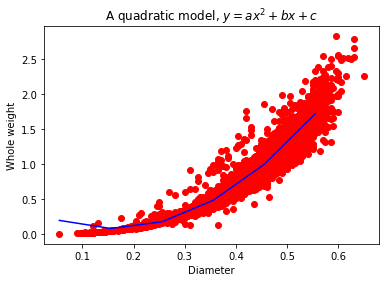

In [454]:
X_grid =np.arange(np.min(X),np.max(X),.1)
X_grid = X_grid.reshape(len(X_grid),1)


plt.scatter(X, Y, color='red')  
plt.plot(X_grid, model.predict(poly_reg.fit_transform(X_grid)), color='blue')
plt.title('A quadratic model, $y = ax^2 + bx +c$')

plt.xlabel("Diameter")
plt.ylabel("Whole weight")
plt.show()


In [455]:
model.coef_ 


array([ 0.        , -3.35552485, 10.49680583])

In [456]:
model.intercept_

0.3477209351149142

In [457]:
np.corrcoef(X_poly[:,2], Y)

array([[1.       , 0.9562976],
       [0.9562976, 1.       ]])

Cubic model : $y=ax^3$


Method 1

In [458]:
from scipy.optimize import curve_fit

In [459]:
def f(x,a):
    return a*x**3

popt, pcov = curve_fit(f,X,Y)

popt, pcov

(array([10.33761423]), array([[0.00049875]]))

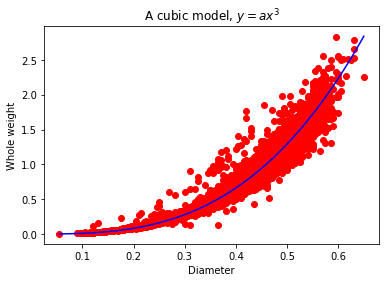

In [460]:
X_ = np.linspace(np.min(X),np.max(X),100)
plt.scatter(X,Y, color='red')
plt.plot(X_, f(X_,*popt),color='blue')
plt.title('A cubic model, $y = ax^3 $')
plt.xlabel("Diameter")
plt.ylabel("Whole weight")
plt.show()

Method 2

In [461]:
poly_reg = PolynomialFeatures(degree=3)
X_poly =poly_reg.fit_transform(X.reshape(-1,1))
X_poly

array([[1.        , 0.365     , 0.133225  , 0.04862712],
       [1.        , 0.265     , 0.070225  , 0.01860963],
       [1.        , 0.42      , 0.1764    , 0.074088  ],
       ...,
       [1.        , 0.475     , 0.225625  , 0.10717187],
       [1.        , 0.485     , 0.235225  , 0.11408412],
       [1.        , 0.555     , 0.308025  , 0.17095388]])

In [462]:
x_train, x_test, y_train, y_test = train_test_split(X_poly,Y,train_size=1/3,random_state=0)

In [463]:
model = LinearRegression(fit_intercept=False)
model.fit(x_train[:,3].reshape(-1,1), y_train)

LinearRegression(fit_intercept=False)

In [464]:
y_predict = model.predict(x_test[:,3].reshape(-1,1))

y_predict

array([0.78914492, 0.65791524, 1.13687754, ..., 0.54210546, 1.03359127,
       0.07622436])

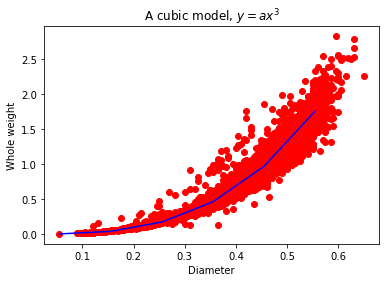

In [465]:
X_grid = np.arange(np.min(X), np.max(X), .1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(X, Y, color='red')  
plt.plot(X_grid, model.predict(poly_reg.fit_transform(X_grid)[:,3].reshape(-1,1)),color='blue')
plt.title('A cubic model, $y = ax^3$')

plt.xlabel("Diameter")
plt.ylabel("Whole weight")
plt.show()

In [466]:
model.coef_

array([10.27992569])

In [467]:
model.score

<bound method RegressorMixin.score of LinearRegression(fit_intercept=False)>

In [468]:
np.corrcoef(X_poly[:,3], Y)

array([[1.        , 0.96307867],
       [0.96307867, 1.        ]])

Exponential model : $\log (y) = a x + b$

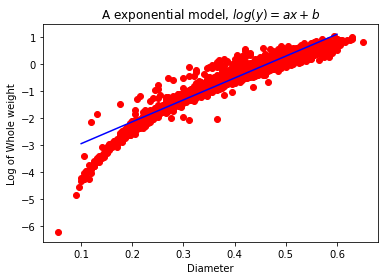

 
8.117 x - 3.751


In [469]:
model = np.poly1d(np.polyfit(X, np.log(Y),1))

polyline = np.linspace(.1, .6, 100)
plt.scatter(X, np.log(Y), color='red')
plt.plot(polyline, model(polyline), color='blue')
plt.title('A exponential model, $log(y) = ax +b $')
plt.xlabel("Diameter")
plt.ylabel("Log of Whole weight")
plt.show()
print(model)


In [470]:
model


poly1d([ 8.11667132, -3.75097866])

In [471]:
np.corrcoef(X, np.log(Y))

array([[1.        , 0.96351208],
       [0.96351208, 1.        ]])

### Task 4

In [472]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Length only

In [473]:
categories = pd.get_dummies(df.Sex, prefix='Sex')

categories.head


<bound method NDFrame.head of       Sex_b'F'  Sex_b'I'  Sex_b'M'
0            0         0         1
1            0         0         1
2            1         0         0
3            0         0         1
4            0         1         0
...        ...       ...       ...
4172         1         0         0
4173         0         0         1
4174         0         0         1
4175         1         0         0
4176         0         0         1

[4177 rows x 3 columns]>

In [474]:
X =df.iloc[:,1].values
Y =df.iloc[:,0].values

Y = Y.astype('str')
np.place(Y, (Y=='I'),[1])
np.place(Y, ((Y=='M')),[0])
np.place(Y, ((Y=='F')),[0])

Y = Y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=10)



In [475]:
model =LogisticRegression(solver='liblinear',random_state=0)
model.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

d:\App\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [476]:
model.classes_

array([0, 1])

In [477]:
y_ = model.predict_proba(x_test.reshape(-1,1))

In [478]:
y_predict = model.predict(x_test.reshape(-1,1))

y_predict

array([0, 0, 0, ..., 0, 0, 0])

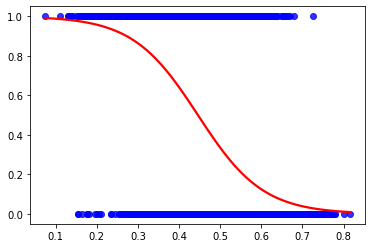

In [479]:
sns.regplot(x=X, y=Y, data=df, logistic=True, ci=None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

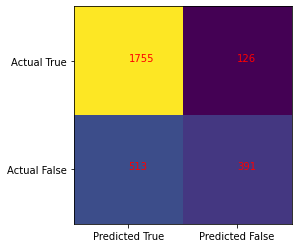

In [480]:
cm =metrics.confusion_matrix(y_test,y_predict)

fig, ax =plt.subplots(figsize = (4,4))

ax.imshow(cm,interpolation='nearest')
# ax.grid(False)

ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted True', 'Predicted False'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual True', 'Actual False'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],color='red')
plt.show()

In [481]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.93      0.85      1881
           1       0.76      0.43      0.55       904

    accuracy                           0.77      2785
   macro avg       0.77      0.68      0.70      2785
weighted avg       0.77      0.77      0.75      2785



Whole Weight only


In [482]:
X = df['Whole weight'].values 

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=10)

In [483]:
model = LogisticRegression(solver='liblinear',random_state=0).fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

d:\App\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [484]:
y_predict = model.predict(x_test.reshape(-1, 1))

y_predict


array([1, 0, 0, ..., 1, 0, 0])

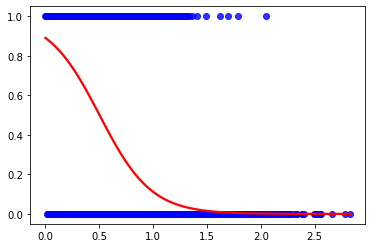

In [485]:
sns.regplot(x=X, y=Y, data=df, logistic=True, ci=None, scatter_kws={
            'color': 'blue'}, line_kws={'color': 'red'})
plt.show()


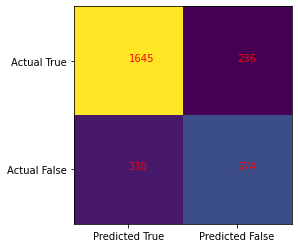

In [486]:
cm =metrics.confusion_matrix(y_test,y_predict)

fig, ax =plt.subplots(figsize = (4,4))

ax.imshow(cm,interpolation='nearest')
# ax.grid(False)

ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted True', 'Predicted False'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual True', 'Actual False'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],color='red')
plt.show()

In [487]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1881
           1       0.71      0.63      0.67       904

    accuracy                           0.80      2785
   macro avg       0.77      0.75      0.76      2785
weighted avg       0.79      0.80      0.79      2785



Class Ring only

In [488]:
X = df['Class_Rings'].values 
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=1/3, random_state=10)


In [489]:
model = LogisticRegression(solver='liblinear',random_state=0).fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

d:\App\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [490]:
y_predict = model.predict(x_test.reshape(-1, 1))

y_predict


array([1, 0, 0, ..., 0, 0, 0])

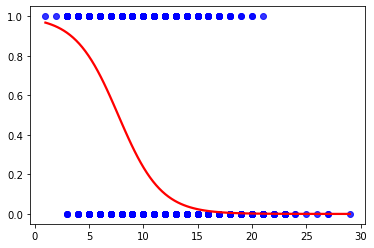

In [491]:
sns.regplot(x=X, y=Y, data=df, logistic=True, ci=None, scatter_kws={
            'color': 'blue'}, line_kws={'color': 'red'})
plt.show()


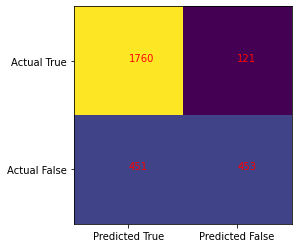

In [492]:
cm =metrics.confusion_matrix(y_test,y_predict)

fig, ax =plt.subplots(figsize = (4,4))

ax.imshow(cm,interpolation='nearest')
# ax.grid(False)

ax.xaxis.set(ticks=(0,1),ticklabels = ('Predicted True', 'Predicted False'))
ax.yaxis.set(ticks=(0,1),ticklabels = ('Actual True', 'Actual False'))

for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],color='red')
plt.show()

In [493]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1881
           1       0.79      0.50      0.61       904

    accuracy                           0.79      2785
   macro avg       0.79      0.72      0.74      2785
weighted avg       0.79      0.79      0.78      2785



Length, whole weight, class ring together

In [494]:
X =df.iloc[:,[1,4,8]].values
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=1/3, random_state=10)


In [495]:
model = LogisticRegression(solver='liblinear',random_state=0).fit(x_train,y_train.reshape(-1,1))

d:\App\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [496]:
y_predict = model.predict(x_test)

y_predict

array([1, 0, 0, ..., 0, 0, 0])

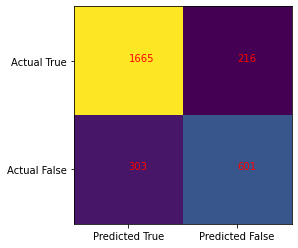

In [497]:
cm = metrics.confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(cm, interpolation='nearest')
# ax.grid(False)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted True', 'Predicted False'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual True', 'Actual False'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()


In [498]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1881
           1       0.74      0.66      0.70       904

    accuracy                           0.81      2785
   macro avg       0.79      0.77      0.78      2785
weighted avg       0.81      0.81      0.81      2785



### Bonus Question

Multi-linear Model 

In [545]:
X =df.iloc[:,1:8].values 
Y = df['Class_Rings'].values

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=10)

In [500]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [501]:
tag_ = df.columns[1:8]
print('{} \n {} '.format(model.intercept_ , list(zip(tag_, model.coef_))))


3.477635299422759 
 [('Length', 1.1344139852473452), ('Diameter', 9.351573580737284), ('Height', 6.474139689046695), ('Whole weight', 9.772160474604556), ('Shucked weight', -20.904924100485612), ('Viscera weight', -11.116695140825415), ('Shell weight', 10.668092824236494)] 


In [502]:
y_predict = model.predict(x_test)

y_predict

array([ 7.74758098, 10.73559274,  9.78641453, ...,  9.49305316,
       11.20317959,  9.61279794])

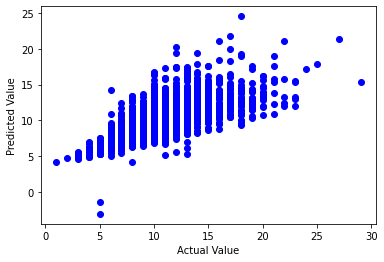

In [503]:
plt.scatter(y_test,y_predict, color='blue')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

In [504]:
r2 = model.score(x_test,y_test)

r2

0.5238851374043184

In [546]:
df['V'] = df['Length'].mul(df['Height']).mul(df['Diameter']).values
X = df[['V','Whole weight']].values
# x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=10)

In [547]:
model = LinearRegression()
model.fit(X,Y)


LinearRegression()

In [552]:
print(model.coef_, model.intercept_)

[50.86840614  1.44672688] 6.968817218222904


In [553]:
r2 = model.score(X, Y)

r2


0.3007809603984207

Polynomial model

In [507]:
poly_reg =PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)  
x_train, x_test, y_train, y_test = train_test_split(X_poly,Y,train_size=1/3,random_state=10)

In [508]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

0.3007809603984207

In [509]:
y_predict = model.predict(x_test)

y_predict


array([ 7.76468063, 10.21888724,  9.36562597, ..., 11.11832546,
       11.67544788,  9.38421231])

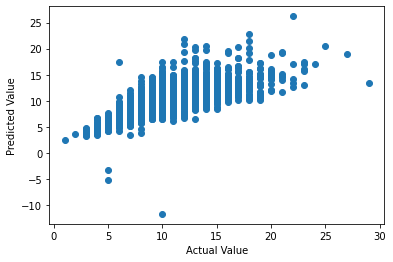

In [510]:
plt.scatter(y_test ,y_predict)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()


In [511]:
r2 = model.score(x_test,y_test)

r2

0.5404319406984834

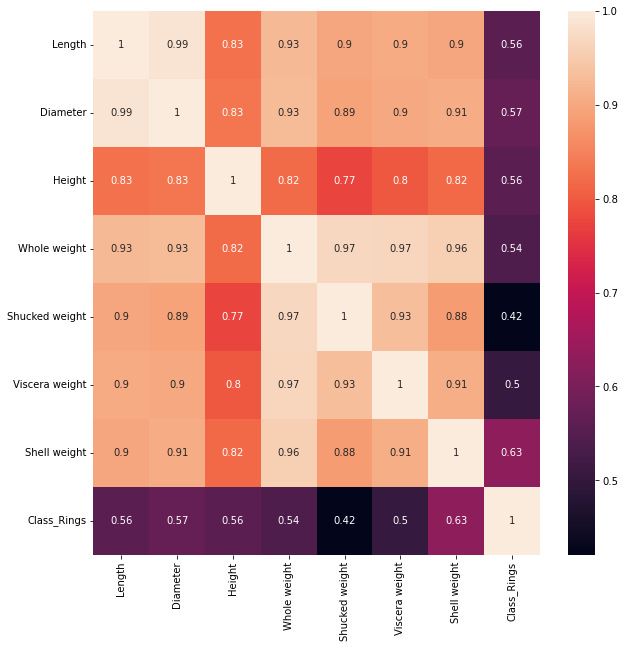

In [512]:
plt.figure(figsize=(10, 10))
corr = df.corr()
corr_plot = sns.heatmap(corr, annot=True)

### Task 5

Clean dataset

In [513]:
adult_data = './dataset/Adult/adult.data'
adult_test = './dataset/Adult/adult.test'
names = ['age','workclass','fnlwgt','education','education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-work','native-country','class']

df_adult = pd.read_csv(adult_data, header = None,names=names, engine='python',sep =',\s', na_values="?").append(pd.read_csv(adult_test, header = None, names=names, sep =',\s', engine='python', na_values="?", skiprows=1))

df_adult = df_adult.dropna()

df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-work,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [514]:
df_adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-work     int64
native-country    object
class             object
dtype: object

In [515]:
df_adult = df_adult.replace({'<=50K.' : '<=50K','>50K.' : '>50K'})


In [516]:
df_adult = df_adult[df_adult['workclass'] != 'Without-pay'].reset_index(drop=True)


gov =['Federal-gov','Local-gov','State-gov']
self_emp = ['Self-emp-not-inc','Self-emp-inc']
private = ['Private']

df_adult.loc[df_adult['workclass'].isin(gov),'employment'] = 'Government'
df_adult.loc[df_adult['workclass'].isin(self_emp),'employment'] = 'Self-Employment'
df_adult.loc[df_adult['workclass'].isin(private) ,'employment'] = 'Private'


df_adult['employment'].unique()

array(['Government', 'Self-Employment', 'Private'], dtype=object)

In [517]:
df_adult.loc[df_adult['occupation'].isin(['Armed-Forces']),'occupation'] = 'Protective-serv'

In [518]:
df_adult.loc[df_adult['education-num'] <= 8,'education']='Preschool'
df_adult.loc[df_adult['education-num'].isin([9,10]),'education'] = 'HS-grad'
df_adult.loc[df_adult['education-num'].isin([11,12]),'education'] = 'Association'  
df_adult.loc[df_adult['education-num'] == 13,'education'] = 'Bachelors'
df_adult.loc[df_adult['education-num'] == 14,'education'] = 'Masters'
df_adult.loc[df_adult['education-num'].isin([15,16]),'education'] =  'Doctorate' 

df_adult['education'].unique()



array(['Bachelors', 'HS-grad', 'Preschool', 'Masters', 'Association',
       'Doctorate'], dtype=object)

In [519]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-work,native-country,class,employment
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Government
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Self-Employment
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Private
3,53,Private,234721,Preschool,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Private
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K,Private
45197,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,Private
45198,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,Private
45199,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,Private


In [520]:

df_adult['age_'] = df_adult['age']
df_adult['employment_'] = df_adult['employment']
df_adult['education_'] = df_adult['education']
df_adult['occupation_'] = df_adult['occupation']
df_adult['race_'] = df_adult['race']
df_adult['sex_'] = df_adult['sex']
# df_adult['hours-per-work_'] = df_adult['hours-per-work']
df_adult['marital-status_'] = df_adult['marital-status']
df_adult['occupation_'] = df_adult['occupation']
df_adult['relationship_'] = df_adult['relationship']
df_adult['native-country_'] = df_adult['native-country']
df_adult['class_'] = df_adult['class']
df_adult['index'] = df_adult.index

Convert all Categorical data to Numeric data


In [521]:
df_adult['employment'] = df_adult['employment'].astype('category')
df_adult['employment'] = df_adult['employment'].cat.codes
df_adult[['employment','employment_','index']].groupby(['employment','employment_']).count()

,,index
employment,employment_,
0,Government,6452
1,Private,33307
2,Self-Employment,5442


In [522]:
df_adult['occupation'] = df_adult['occupation'].astype('category')
df_adult['occupation'] = df_adult['occupation'].cat.codes
df_adult[['occupation','occupation_','index']].groupby(['occupation','occupation_']).count()

,,index
occupation,occupation_,
0,Adm-clerical,5537
1,Craft-repair,6019
2,Exec-managerial,5983
3,Farming-fishing,1472
4,Handlers-cleaners,2044
5,Machine-op-inspct,2968
6,Other-service,4806
7,Priv-house-serv,232
8,Prof-specialty,6008


In [523]:

df_adult['sex'] = df_adult['sex'].astype('category')
df_adult['sex'] = df_adult['sex'].cat.codes
df_adult[['sex','sex_','index']].groupby(['sex','sex_']).count()

,,index
sex,sex_,
0,Female,14688
1,Male,30513


In [524]:
df_adult['education'] = df_adult['education'].astype('category')
df_adult['education'] = df_adult['education'].cat.codes
df_adult[['education','education_','index']].groupby(['education','education_']).count()

,,index
education,education_,
0,Association,3464
1,Bachelors,7570
2,Doctorate,1329
3,HS-grad,24665
4,Masters,2514
5,Preschool,5659


In [525]:
df_adult['race'] = df_adult['race'].astype('category')
df_adult['race'] = df_adult['race'].cat.codes
df_adult[['race','race_','index']].groupby(['race','race_']).count()


,,index
race,race_,
0,Amer-Indian-Eskimo,435
1,Asian-Pac-Islander,1302
2,Black,4227
3,Other,353
4,White,38884


In [526]:
df_adult['marital-status'] = df_adult['marital-status'].astype('category')
df_adult['marital-status'] = df_adult['marital-status'].cat.codes
df_adult[['marital-status','marital-status_','index']].groupby(['marital-status','marital-status_']).count()

,,index
marital-status,marital-status_,
0,Divorced,6297
1,Married-AF-spouse,32
2,Married-civ-spouse,21042
3,Married-spouse-absent,551
4,Never-married,14592
5,Separated,1411
6,Widowed,1276


In [527]:
df_adult['relationship'] = df_adult['relationship'].astype('category')
df_adult['relationship'] = df_adult['relationship'].cat.codes
df_adult[['relationship','relationship_','index']].groupby(['relationship','relationship_']).count()

,,index
relationship,relationship_,
0,Husband,18658
1,Not-in-family,11702
2,Other-relative,1349
3,Own-child,6618
4,Unmarried,4786
5,Wife,2088


In [528]:
df_adult['native-country'] = df_adult['native-country'].astype('category')
df_adult['native-country'] = df_adult['native-country'].cat.codes
df_adult[['native-country','native-country_','index']].groupby(['native-country','native-country_']).count()

,,index
native-country,native-country_,
0,Cambodia,26
1,Canada,163
2,China,113
3,Columbia,82
4,Cuba,133
5,Dominican-Republic,97
6,Ecuador,43
7,El-Salvador,147
8,England,119


In [529]:
df_adult['class'] = df_adult['class'].astype('category')
df_adult['class'] = df_adult['class'].cat.codes
df_adult[['class','class_','index']].groupby(['class','class_']).count()

,,index
class,class_,
0,<=50K,33995
1,>50K,11206


Normalize Continuous Data

In [530]:
print('   Mean Age = ' + str(df_adult['age'].mean()))
print('Std Dev Age = ' + str(df_adult['age'].std()))
df_adult['age'] = (df_adult['age'] - df_adult['age'].mean()) / df_adult['age'].std()

   Mean Age = 38.54388177252716
Std Dev Age = 13.212841710741197


In [531]:
print('   Mean hours-per-work = ' + str(df_adult['hours-per-work'].mean()))
print('Std Dev hours-per-work = ' + str(df_adult['hours-per-work'].std()))
df_adult['hours-per-work'] = (df_adult['hours-per-work'] - df_adult['hours-per-work'].mean()
                   ) / df_adult['hours-per-work'].std()


   Mean hours-per-work = 40.94126236145218
Std Dev hours-per-work = 12.004177970669991


In [532]:
df_adult = df_adult[['index',
       'age',
       'fnlwgt',
       'employment',
       'occupation',
       'marital-status',
        'relationship',
       'education',
       'race',
       'sex',
       'capital-gain','capital-loss',
       'hours-per-work',
       'native-country',
       'class']].copy()
print(df_adult.shape)
df_adult

(45201, 15)


,index,age,fnlwgt,employment,occupation,marital-status,relationship,education,race,sex,capital-gain,capital-loss,hours-per-work,native-country,class
0,0,0.034521,77516,0,0,4,1,1,4,1,2174,0,-0.078411,38,0
1,1,0.867044,83311,2,2,2,0,1,4,1,0,0,-2.327628,38,0
2,2,-0.041163,215646,1,4,0,1,3,4,1,0,0,-0.078411,38,0
3,3,1.094096,234721,1,4,2,0,5,2,1,0,0,-0.078411,38,0
4,4,-0.798003,338409,1,8,2,5,1,2,0,0,0,-0.078411,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45196,45196,-0.419583,245211,1,8,4,3,1,4,1,0,0,-0.078411,38,0
45197,45197,0.034521,215419,1,8,0,1,1,4,0,0,0,-0.411629,38,0
45198,45198,-0.041163,374983,1,8,2,0,1,4,1,0,0,0.754632,38,0
45199,45199,0.412941,83891,1,0,0,3,1,1,1,5455,0,-0.078411,38,0


In [533]:
df_adult.to_csv('./dataset/Adult/adult-clean.csv',index=False)

In [534]:
df_adult = pd.read_csv('./dataset/Adult/adult-clean.csv')

Logistics Regression model for attribute sex (M/F) using combinations of attributes from adult dataset

In [535]:
# category = ['employment','occupation','marital-status','relationship','education','race','capital-gain','capital-loss','hours-per-work','native-country','class']
category = ['age','employment', 'relationship', 'education', 'class', 'hours-per-work', ]
X_tag = df_adult[category]
X = df_adult[category].values
Y = df_adult['sex'].values

x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=1/3,random_state=0)

In [536]:
model = LogisticRegression(random_state=0).fit(x_train,y_train)

print(list(zip(X_tag,model.coef_)))

[('age', array([-0.26538856,  0.44679886, -0.87174225,  0.16670604,  0.9573244 ,
        0.28209329]))]


In [537]:
y_predict = model.predict(x_test)

metrics.accuracy_score(y_test,y_predict)



0.7724165394570917

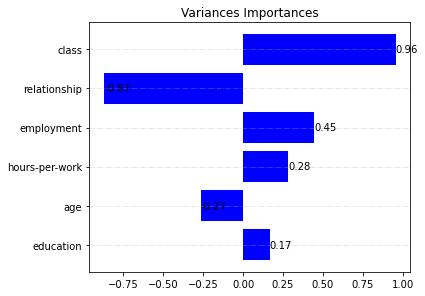

In [538]:
coef_lr = pd.DataFrame({'coef': model.coef_.flatten(), 'var': df_adult[category].columns})
index =  np.abs(coef_lr['coef']).sort_values().index
coef_lr = coef_lr.loc[index,:]


fig,ax=plt.subplots()
x, y = coef_lr['var'], coef_lr['coef']
values = plt.barh(x, y, color='blue')

for v in values:
    w = v.get_width()
    ax.text(w, v.get_y()+v.get_height()/2, '%.2f' %
            w, ha='left', va='center')

plt.grid(linestyle="-.", axis='y', alpha=0.4)
plt.tight_layout()
plt.title("Variances Importances")
plt.show()

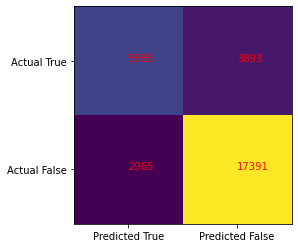

In [539]:
cm = metrics.confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(4, 4))

ax.imshow(cm, interpolation='nearest')
# ax.grid(False)

ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted True', 'Predicted False'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual True', 'Actual False'))

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], color='red')
plt.show()


In [540]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      9778
           1       0.82      0.85      0.84     20356

    accuracy                           0.77     30134
   macro avg       0.74      0.73      0.73     30134
weighted avg       0.77      0.77      0.77     30134

